# Authors
    - Josue Happe
        - josue.hape.etu@univ-lille.fr
    - Selim Lakhdar
        - selim.lakhdar.etu@univ-lille.fr
------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(0)

**Question** Soit $\mathbf W$ une matrice de poids associée à un graphe non dirigé pondéré $G$ de $n$ noeuds et $\mathbf D$ sa matrice diagonale. Soit $\mathbf L = \mathbf D - \mathbf W$. Vérifier que $\mathbf L$ a un vecteur propre égal à $\mathbf 1_n$ (vecteur de $n$ valeurs égales à 1). Quelle est la valeur propre associée ? 

*Réponse* 

Pour la ligne $i$ on a $(\mathbf L\mathbf 1_n)_i = d_i-\sum_{j} \mathbf W_{ij}=0$. Donc $\mathbf L\mathbf 1_n$ est un vecteur de 0 et donc on a bien $\mathbf L\mathbf 1_n = 0*\mathbf 1_n$.

**Question** Charger le jeu de données breast cancer de sklearn. Construire une matrice de poids en utilisant un noyau Gaussien sur les attributs normalisés et vérifier cette propriété. 

In [2]:
from sklearn import datasets, preprocessing
X, y = datasets.load_breast_cancer(return_X_y=True)
scale = preprocessing.StandardScaler()
X = scale.fit_transform(X)

In [3]:
X.shape

(569, 30)

In [4]:
from sklearn.metrics.pairwise import pairwise_kernels
W1 = pairwise_kernels(X, metric="rbf")
W1 = W1 - np.eye(W1.shape[0])

In [5]:
L1 = np.diag(W1.sum(axis=1)) - W1

In [6]:
np.alltrue(np.isclose(L1@np.ones(L1.shape[0]), np.zeros(L1.shape[0])))

True

**Question** Avec les fonctions que vous avez créées lors du TP précédent, faire un graphe $G_2$ de 12 noeuds avec 3 composantes connexes : deux cercles, et un graphe complet. Afficher la matrice laplacienne et la décomposition spectrale. Quelle est la propriété de cette matrice laplacienne due au fait que le graphe a 3 composantes connexes ? Quelle est la multiplicité de la valeur propre 0 ?  Comparer les résultats avec la décomposition spectrale de la matrice laplacienne du cercle de taille 4.

In [7]:
def cercle(n):
    G = np.eye(n)
    G = np.vstack((G[-1],G[:-1]))
    G = G + G.T
    return G
def complet(n):
    return np.ones((n,n))-np.eye(n)

In [8]:
W2 = np.zeros((12,12))
W2[:4,:4] = cercle(4)
W2[4:8, 4:8] = complet(4)
W2[8:, 8:] = cercle(4)

In [9]:
L2 = np.diag(W2.sum(axis=1)) - W2
L2

array([[ 2., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3., -1., -1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  3., -1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1.,  3., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  2.]])

In [10]:
def aff_dec_spec(L):
    E, V = np.linalg.eig(L)
    ind = np.argsort(np.abs(E))
    for i  in ind:
        print(E[i], V[:,i])

In [11]:
aff_dec_spec(L2)

-1.1102230246251565e-16 [ 0.   0.   0.   0.  -0.5 -0.5 -0.5 -0.5  0.   0.   0.   0. ]
-2.220446049250313e-16 [0.5 0.5 0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
-2.220446049250313e-16 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.5 0.5]
1.9999999999999996 [ 2.77555756e-17 -7.07106781e-01  2.86262916e-16  7.07106781e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
1.9999999999999996 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.77555756e-17 -7.07106781e-01  2.86262916e-16  7.07106781e-01]
2.0000000000000013 [ 7.07106781e-01 -2.03355857e-16 -7.07106781e-01  1.01920482e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
2.0000000000000013 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.000

In [12]:
aff_dec_spec(np.eye(4)*2 - cercle(4))


-2.220446049250313e-16 [0.5 0.5 0.5 0.5]
1.9999999999999996 [ 2.77555756e-17 -7.07106781e-01  2.86262916e-16  7.07106781e-01]
2.0000000000000013 [ 7.07106781e-01 -2.03355857e-16 -7.07106781e-01  1.01920482e-16]
3.9999999999999982 [-0.5  0.5 -0.5  0.5]


**Question** Démontrez ce que vous avez observé.

*Réponse*


**Question** Observez quelle est la décomposition spectrale d'un graphe complet sur plusieurs exemples. 

In [13]:
aff_dec_spec(np.eye(10)*9 - complet(10))

-4.440892098500626e-16 [-0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777
 -0.31622777 -0.31622777 -0.31622777 -0.31622777]
9.999999999999993 [-0.01063254  0.04256179  0.02535657 -0.06670654  0.08805329 -0.0587721
 -0.44842371  0.83532282 -0.19336806 -0.21339151]
9.999999999999995 [-0.0532821  -0.18825943  0.90400119 -0.0505031  -0.0505031  -0.0505031
 -0.0505031  -0.0505031  -0.0505031  -0.35944106]
9.999999999999998 [-0.04386807  0.18098029  0.03033103 -0.02164458 -0.31730726 -0.31359605
  0.7870217   0.16335929 -0.15991803 -0.30535833]
10.0 [ 0.9486833  -0.10540926 -0.10540926 -0.10540926 -0.10540926 -0.10540926
 -0.10540926 -0.10540926 -0.10540926 -0.10540926]
10.0 [ 0.2265915   0.89034436 -0.13961698 -0.13961698 -0.13961698 -0.13961698
 -0.13961698 -0.13961698 -0.13961698 -0.13961698]
10.0 [-0.07253516  0.20142133  0.07924837  0.58193479  0.41464067 -0.46990824
  0.02125048 -0.18681371 -0.18681371 -0.38242483]
10.0 [-0.0168179  -0.46593257  0.07565117 -0.2092

**Rappel** Si $\mathbf f$ est une fonction qui associe une valeur à chaque noeud, on rappelle que $\mathbf f^\top \mathbf L \mathbf f$ est la valeur de *smoothness* de $\mathbf f$, indiquant comment $\mathbf f$ est lisse sur le graphe. 



**Question** Quelles sont les fonctions qui sont les plus lisses possible sur un graphe. Vérifiez cela sur $G_1$, puis sur $G_2$. En quoi celles de $G_2$ sont différentes de celles de $G_1$ ?

*Réponse* 

- Fonctions constantes 
- Sur des graphes non connexes, constantes sur chaque composante connexe

**Question** Faire la version itérative sur un cercle de 10 noeuds. Les deux premiers noeuds sont étiquetés avec 1 et 0. Cette version itérative calcule la fonction harmonique en effectuant à chaque itération la moyenne des étiquettes des noeuds voisins (sauf pour les noeuds 0 et 1 qui restent fixés).

In [14]:
W = cercle(10)
f = np.zeros(10)
f[0] = 1
f[1] = 0

In [15]:
W

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [16]:
indices = set(range(10))
indices.remove(0)
indices.remove(1)
indices

{2, 3, 4, 5, 6, 7, 8, 9}

In [17]:
f_new = np.zeros(10)
f_cur = f.copy()
end_loop = False
while not end_loop:
    for i in indices:
        f_cur[i] = (f_new[(i+1)%10] + f_new[(i-1)%10]) / 2
    print(f_new)
    end_loop = np.alltrue(np.isclose(f_new, f_cur))
    f_new = f_cur
    f_cur = f_new.copy()    


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
[1.   0.   0.   0.   0.   0.   0.   0.   0.25 0.5 ]
[1.    0.    0.    0.    0.    0.    0.    0.125 0.25  0.625]
[1.     0.     0.     0.     0.     0.     0.0625 0.125  0.375  0.625 ]
[1.      0.      0.      0.      0.      0.03125 0.0625  0.21875 0.375
 0.6875 ]
[1.       0.       0.       0.       0.015625 0.03125  0.125    0.21875
 0.453125 0.6875  ]
[1.        0.        0.        0.0078125 0.015625  0.0703125 0.125
 0.2890625 0.453125  0.7265625]
[1.         0.         0.00390625 0.0078125  0.0390625  0.0703125
 0.1796875  0.2890625  0.5078125  0.7265625 ]
[1.         0.         0.00390625 0.02148438 0.0390625  0.109375
 0.1796875  0.34375    0.5078125  0.75390625]
[1.         0.         0.01074219 0.02148438 0.06542969 0.109375
 0.2265625  0.34375    0.54882812 0.75390625]
[1.         0.         0.01074219 0.03808594 0.06542969 0.14599609
 0.2265625  0.38769531 0.54882812 0

**Question** Dans le cas général d'un graphe quelconque, de matrice de poids $\mathbf W$, pour un $i$ correspondant à un noeud non étiqueté, $f^{(t+1)}_i$ est la moyenne pondérée des valeurs $f^{(t)}_j$ pour tous les noeuds $j$ voisins de $i$.  

- Écrire la formule générale d'une itération de ce calcul, quel que soit le graphe. 


*Réponse*

 Soit pour un noeud $i$ non étiqueté

$$ f^{(t+1)}_i = \frac{1}{d_{i}}\sum_{j}^{n} \mathbf W_{ij} f^{(t)}_j$$


**Question** Reformuler cela mais avec la matrice stochastique $\mathbf P$ associée à $\mathbf W$

*Réponse* 

$$ f^{(t+1)}_i = \sum_{j}^{n} \mathbf P_{ij} f^{(t)}_j$$


**Question** Toujours sur ce cercle de 10 noeuds dont les deux premiers noeuds sont étiquetés avec 1 et 0, faire maintenant l'algorithme de Zhu et al 2003 en calculant la solution harmonique par la formule analytique donnée en cours.

In [18]:
Wul = W[2:, :2]
Wul

array([[0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.]])

In [19]:
Wuu = W[2:, 2:]
Wuu

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.]])

In [20]:
fl = f[:2]
fl

array([1., 0.])

In [21]:
D = np.diag(W.sum(axis=1))

In [22]:
L = D - W
Luu = L[2:,2:]

In [23]:
fu = (np.linalg.inv(Luu))@Wul@fl

In [24]:
fu

array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889])

**Question** Refaire la même chose mais en reprenant la matrice stochastique $\mathbf P$ associée à $\mathbf W$. Vérifiez que vous obtenez bien le même résultat.

In [25]:
P = W/W.sum(axis=1)
Pul = P[2:, :2]
Puu = P[2:, 2:]
PL = np.eye(10) - P
PLuu = PL[2:, 2:]
pfu = (np.linalg.inv(PLuu))@Pul@fl

In [26]:
pfu

array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889])

**Question** Sur ce petit graphe, on applique maintenant la méthode de Zhou et al 2003. Construire la matrice $\mathbf S$

In [27]:
d = np.sum(W, axis=1)
D12 = np.diag(d**(-1/2))
S = D12@W@D12
S

array([[0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. ]])

**Question** Prendre une valeur de $\alpha=.99$. Faire la version itérative.

In [28]:
alpha = .99
f_cur = rng.random(10)
end_loop = False
while not end_loop:
    print(f_cur)
    f_new = alpha*S@f_cur + (1-alpha)*f
    end_loop = np.alltrue(np.allclose(f_new, f_cur))
    f_cur = f_new


[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]
[0.55382229 0.57003056 0.62373591 0.508077   0.58943476 0.4263148
 0.76114522 0.69361874 0.63123119 0.74867575]
[0.66275962 0.58289131 0.53366324 0.60051948 0.46252394 0.66853709
 0.5543671  0.68922632 0.71393577 0.58660147]
[0.58889893 0.59222932 0.58578834 0.49311265 0.628183   0.50336106
 0.67209289 0.62780992 0.63153476 0.68146422]
[0.6404783  0.5814702  0.53724427 0.60091582 0.49325449 0.64363657
 0.55992964 0.64529569 0.6480907  0.60411467]
[0.59686451 0.58297267 0.58528108 0.51009689 0.61605343 0.52132614
 0.63802147 0.59797007 0.61845813 0.63784165]
[0.61430309 0.58516207 0.54106943 0.59466058 0.5105544  0.62076707
 0.55405162 0.6219574  0.6117268  0.60158471]
[0.59743965 0.5719094  0.58401221 0.5205538  0.60163669 0.52697998
 0.61514861 0.57706032 0.60565334 0.6068848 ]
[0.59350313 0.58481867 0.54076928 0.58689621 0.51852922 0.60230872
 0.54649995 0.60429697 0.58605

 0.09310637 0.09588951 0.10064648 0.10738969]
[0.11631579 0.10740785 0.1006232  0.09590766 0.0930831  0.09217531
 0.0930831  0.09590766 0.1006232  0.10740785]
[0.11633377 0.1073848  0.10064118 0.09588462 0.09310107 0.09215226
 0.09310107 0.09588462 0.10064118 0.1073848 ]
[0.11631096 0.1074026  0.10061836 0.09590241 0.09307826 0.09217006
 0.09307826 0.09590241 0.10061836 0.1074026 ]
[0.11632857 0.10738001 0.10063598 0.09587983 0.09309587 0.09214747
 0.09309587 0.09587983 0.10063598 0.10738001]
[0.11630621 0.10739745 0.10061362 0.09589727 0.09307351 0.09216492
 0.09307351 0.09589727 0.10061362 0.10739745]
[0.11632348 0.10737532 0.10063089 0.09587513 0.09309078 0.09214278
 0.09309078 0.09587513 0.10063089 0.10737532]
[0.11630156 0.10739241 0.10060897 0.09589223 0.09306887 0.09215987
 0.09306887 0.09589223 0.10060897 0.10739241]
[0.11631849 0.10737072 0.1006259  0.09587053 0.09308579 0.09213818
 0.09308579 0.09587053 0.1006259  0.10737072]
[0.11629701 0.10738747 0.10060442 0.09588728 0.093

**Question** Calculer maintenant le résultat avec la formule analytique.

In [29]:
np.linalg.inv(np.eye(10)- alpha*S)@f

array([11.60726288, 10.71440694, 10.03800368,  9.56438837,  9.28399302,
        9.19115309,  9.28399302,  9.56438837, 10.03800368, 10.71440694])

**Question** Sur plusieurs jeux de données considérer une portion variable de données étiquetées et apprendre les étiquettes avec la méthode des fonctions harmoniques de Zhu et 2003,  et la méthode de Global-Local consistency de Zhou et al 2003. 

- Prendre les données de breast cancer 
- Prendre le problème des deux lunes, avec un noyau Gaussien, avec un knn graphe
- Prendre le jeu de données digits, avec noyau Gaussien, avec un knn graphe, considérer plusieurs problèmes binaires de votre choix à partir de ces données 
- Trouver un jeu de données public et essayer ces méthodes de classification

On prendra une règle de classification adaptée car les deux méthodes sont une relaxation réelle de ce problème discret. 

On fera une analyse en fonction de la taille des données étiquetées.

In [30]:
#Une fonction pour la méthode de zhu
def zhu(W,y,nb_etiquettes):
    Wul = W[nb_etiquettes:, :nb_etiquettes]
    fl = y[:nb_etiquettes]
    D = np.diag(W.sum(axis=1))
    L = D - W
    Luu = L[nb_etiquettes:,nb_etiquettes:]
    fu = (np.linalg.inv(Luu))@Wul@fl
    return np.round(fu)


In [31]:
#Une fonction pour récupérer la matrice S depuis une matrice W
def getS(W):
    d = np.sum(W, axis=1)
    D12 = np.diag(d**(-1/2))
    S = D12@W@D12
    return S

In [32]:
#Une fonction pour la méthode de zhou (de façon analytique)
def zhou(W,y,nb_etiquettes,condition):
    S = getS(W)
    f = np.zeros(S.shape[0])
    f[:nb_etiquettes] = y[:nb_etiquettes]
    pred = np.linalg.inv(np.eye(W.shape[0])- alpha*S)@f
    for i in range(len(pred)):
        if pred[i]<condition:
            pred[i] = 0
        else:
            pred[i] = 1
    return pred

In [33]:
from sklearn.metrics import classification_report
#Une fonction qui teste les 2 méthodes sur une matrice donnée:
def print_res(W,y,portion_etiq,nom_dataset, display=False, X=None):
    for p in portion_etiq:
        zhu_pred = zhu(W,y,p)
        print("-----------"+nom_dataset+" prédit avec Zhu pour "+str(p)+" étiquettes connues")
        print(classification_report(y[p:],zhu_pred,zero_division=True))
        if display:
            full_pred = np.append(y[:p], zhu_pred)
            plt.scatter(X[:,0], X[:,1], c=full_pred)
            plt.title("Zhu: " + nom_dataset + ' with ' + str(p) + ' labelled')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.show()
        zhou_pred = zhou(W,y,p,1.3)
        print("-----------"+nom_dataset+" prédit avec Zhou pour "+str(p)+" étiquettes connues")
        print(classification_report(y[p:],zhou_pred[p:],zero_division=True))
        if display:
            plt.scatter(X[:,0], X[:,1], c=zhou_pred)
            plt.title("Zhou: " + nom_dataset + ' with ' + str(p) + ' labelled')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.show()
        print("=========================================================================================")

### Avec Breast cancer

In [34]:
#On teste breast cancer
from sklearn import datasets, preprocessing
X_breast, y_breast = datasets.load_breast_cancer(return_X_y=True)
print("Nb Samples:", y_breast.shape[0])
scale = preprocessing.StandardScaler()
X_breast = scale.fit_transform(X_breast)
W1 = pairwise_kernels(X_breast, metric="rbf")
W1 = W1 - np.eye(W1.shape[0])
print_res(W1,y_breast,[2,5,10,50,100,200],"Breast Cancer")

Nb Samples: 569
-----------Breast Cancer prédit avec Zhu pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       210
           1       1.00      0.00      0.00       357

    accuracy                           0.37       567
   macro avg       0.69      0.50      0.27       567
weighted avg       0.77      0.37      0.20       567

-----------Breast Cancer prédit avec Zhou pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       210
           1       1.00      0.00      0.00       357

    accuracy                           0.37       567
   macro avg       0.69      0.50      0.27       567
weighted avg       0.77      0.37      0.20       567

-----------Breast Cancer prédit avec Zhu pour 5 étiquettes connues
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       207
           1       

On remarque que:  
   - pour 2 étiquettes connues, on obtient les mêmes résultats avec les deux méthodes.
   - pour 5 étiquettes connues, on obtient les memes résultats qu'avec 2 étiquettes connues.
   - pour 10 étiquettes connues, on obtient les memes résultats qu'avec 2 et 5 étiquettes connues.
   - pour 50 étiquettes connues, la deuixème méthode (Zhou) arrive à mieux prédire les classes (Score f1 plus élevé). On remarque aussi une légère dégradation pour la première méthode comparé à 10 étiquettes connues.
   - pour 100 étiquettes connues, la première méthode (Zhu) arrive à mieux prédire les classes (Score f1 plus élevé).
   - pour 200 étiquettes connues, la première méthode (Zhu) est beaucoup mieux que la deuixème.  

=> On remarque, de façon générale, que la première méthode (Zhu) arrive à mieux classer quand on augmente les nombre d'étiquettes connues que la deuxième méthode.

### Avec moons (noeud gaussien)

Nb Samples: 2000
-----------Moons avec noeud gaussien prédit avec Zhu pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       999
           1       1.00      0.00      0.00       999

    accuracy                           0.50      1998
   macro avg       0.75      0.50      0.33      1998
weighted avg       0.75      0.50      0.33      1998



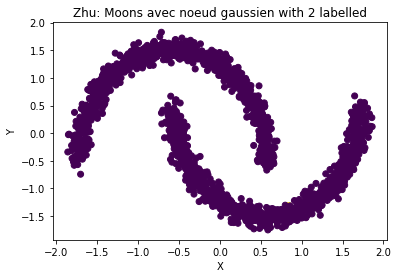

-----------Moons avec noeud gaussien prédit avec Zhou pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       999
           1       1.00      0.00      0.00       999

    accuracy                           0.50      1998
   macro avg       0.75      0.50      0.33      1998
weighted avg       0.75      0.50      0.33      1998



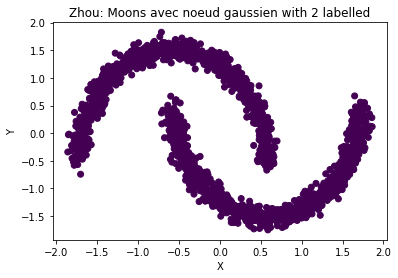

-----------Moons avec noeud gaussien prédit avec Zhu pour 5 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       998
           1       0.50      1.00      0.67       997

    accuracy                           0.50      1995
   macro avg       0.75      0.50      0.33      1995
weighted avg       0.75      0.50      0.33      1995



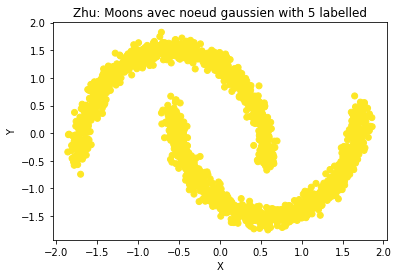

-----------Moons avec noeud gaussien prédit avec Zhou pour 5 étiquettes connues
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       998
           1       1.00      0.00      0.00       997

    accuracy                           0.50      1995
   macro avg       0.75      0.50      0.33      1995
weighted avg       0.75      0.50      0.33      1995



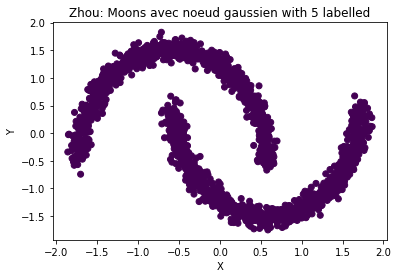

-----------Moons avec noeud gaussien prédit avec Zhu pour 10 étiquettes connues
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       994
           1       1.00      0.00      0.00       996

    accuracy                           0.50      1990
   macro avg       0.75      0.50      0.33      1990
weighted avg       0.75      0.50      0.33      1990



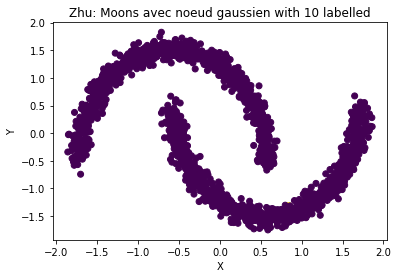

-----------Moons avec noeud gaussien prédit avec Zhou pour 10 étiquettes connues
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       994
           1       1.00      0.00      0.00       996

    accuracy                           0.50      1990
   macro avg       0.75      0.50      0.33      1990
weighted avg       0.75      0.50      0.33      1990



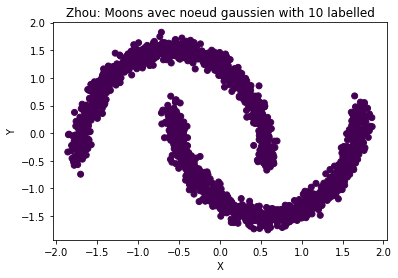

-----------Moons avec noeud gaussien prédit avec Zhu pour 50 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       976
           1       0.50      1.00      0.67       974

    accuracy                           0.50      1950
   macro avg       0.75      0.50      0.33      1950
weighted avg       0.75      0.50      0.33      1950



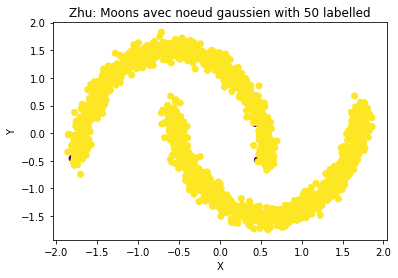

-----------Moons avec noeud gaussien prédit avec Zhou pour 50 étiquettes connues
              precision    recall  f1-score   support

           0       0.64      0.40      0.49       976
           1       0.56      0.78      0.65       974

    accuracy                           0.59      1950
   macro avg       0.60      0.59      0.57      1950
weighted avg       0.60      0.59      0.57      1950



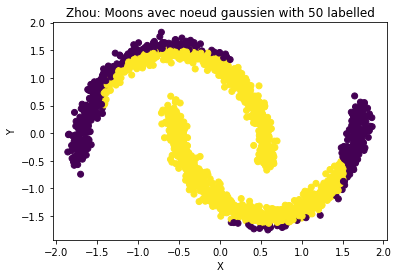

-----------Moons avec noeud gaussien prédit avec Zhu pour 100 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       955
           1       0.50      1.00      0.66       945

    accuracy                           0.50      1900
   macro avg       0.75      0.50      0.33      1900
weighted avg       0.75      0.50      0.33      1900



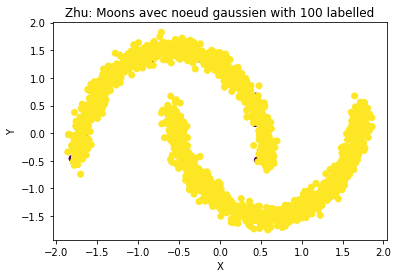

-----------Moons avec noeud gaussien prédit avec Zhou pour 100 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       955
           1       0.50      1.00      0.66       945

    accuracy                           0.50      1900
   macro avg       0.75      0.50      0.33      1900
weighted avg       0.75      0.50      0.33      1900



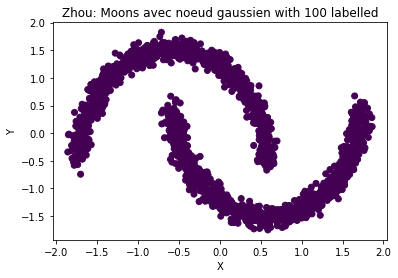

-----------Moons avec noeud gaussien prédit avec Zhu pour 200 étiquettes connues
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       900
           1       0.89      0.89      0.89       900

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800



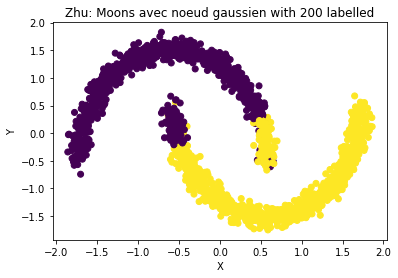

-----------Moons avec noeud gaussien prédit avec Zhou pour 200 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       900
           1       0.50      1.00      0.67       900

    accuracy                           0.50      1800
   macro avg       0.75      0.50      0.33      1800
weighted avg       0.75      0.50      0.33      1800



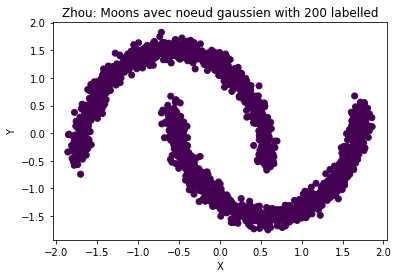

In [35]:
#On teste moons
X_moons, y_moons = datasets.make_moons(n_samples=2000, noise=0.05)
print("Nb Samples:", y_moons.shape[0])
scale = preprocessing.StandardScaler()
X_moons = scale.fit_transform(X_moons)
W_moons = pairwise_kernels(X_moons, metric="rbf")
W_moons = W_moons - np.eye(W_moons.shape[0])
print_res(W_moons,y_moons,[2,5,10,50,100,200],"Moons avec noeud gaussien", display=True, X=X_moons)

On remarque que:  
   - pour 2 étiquettes connues, on obtient les mêmes résultats avec les deux méthodes.
   - pour 5 étiquettes connues, on obtient les memes résultats qu'avec 2 étiquettes connues.
   - pour 10 étiquettes connues, on obtient les memes résultats qu'avec 2 et 5 étiquettes connues.
   - pour 50 étiquettes connues, la deuixème méthode (Zhou) arrive à mieux prédire les classes (Score f1 plus élevé).
   - pour 100 étiquettes connues, on obtient les memes résultats. Prédiction d'une seule calsse !
   - pour 200 étiquettes connues, la première méthode (Zhu) est mieux que la deuixème, cependant il y'a quelques erreurs de classification. On remarque que la deuxième méthode est équivalente à ne prédire qu'une seule classe !  

=> On remarque, de façon générale, que la deuxième méthode (Zhou) se dégrade quand on augmente le nombre d'étiquettes connues.

### Avec moons (knn graph)

-----------Moons avec un knn graphe prédit avec Zhu pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       999
           1       1.00      1.00      1.00       999

    accuracy                           1.00      1998
   macro avg       1.00      1.00      1.00      1998
weighted avg       1.00      1.00      1.00      1998



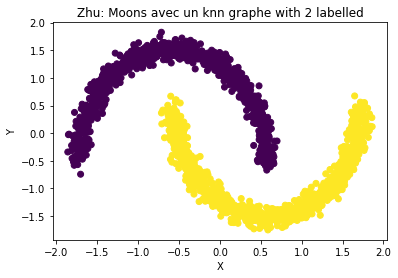

-----------Moons avec un knn graphe prédit avec Zhou pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       999
           1       1.00      0.00      0.00       999

    accuracy                           0.50      1998
   macro avg       0.75      0.50      0.33      1998
weighted avg       0.75      0.50      0.33      1998



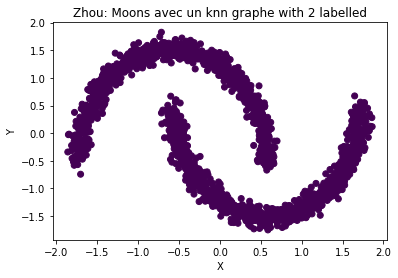

-----------Moons avec un knn graphe prédit avec Zhu pour 5 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       998
           1       1.00      1.00      1.00       997

    accuracy                           1.00      1995
   macro avg       1.00      1.00      1.00      1995
weighted avg       1.00      1.00      1.00      1995



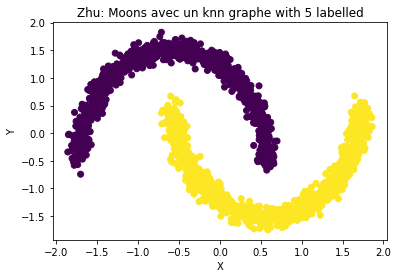

-----------Moons avec un knn graphe prédit avec Zhou pour 5 étiquettes connues
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       998
           1       1.00      0.04      0.08       997

    accuracy                           0.52      1995
   macro avg       0.76      0.52      0.38      1995
weighted avg       0.76      0.52      0.38      1995



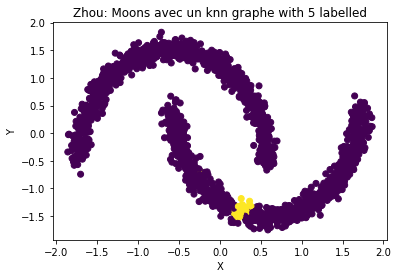

-----------Moons avec un knn graphe prédit avec Zhu pour 10 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00       996

    accuracy                           1.00      1990
   macro avg       1.00      1.00      1.00      1990
weighted avg       1.00      1.00      1.00      1990



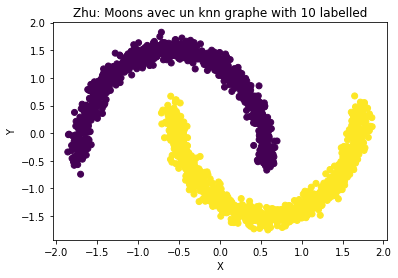

-----------Moons avec un knn graphe prédit avec Zhou pour 10 étiquettes connues
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       994
           1       1.00      0.06      0.11       996

    accuracy                           0.53      1990
   macro avg       0.76      0.53      0.40      1990
weighted avg       0.76      0.53      0.40      1990



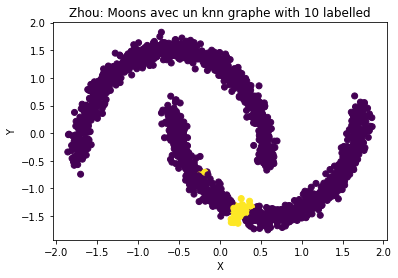

-----------Moons avec un knn graphe prédit avec Zhu pour 50 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       1.00      1.00      1.00       974

    accuracy                           1.00      1950
   macro avg       1.00      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950



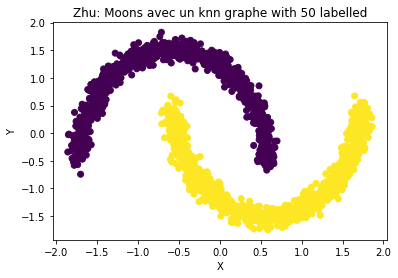

-----------Moons avec un knn graphe prédit avec Zhou pour 50 étiquettes connues
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       976
           1       1.00      0.69      0.82       974

    accuracy                           0.85      1950
   macro avg       0.88      0.85      0.84      1950
weighted avg       0.88      0.85      0.84      1950



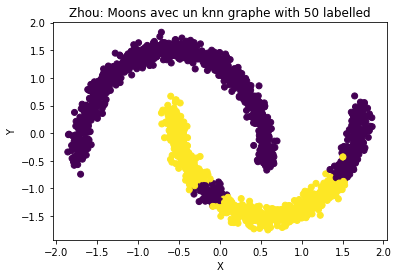

-----------Moons avec un knn graphe prédit avec Zhu pour 100 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       955
           1       1.00      1.00      1.00       945

    accuracy                           1.00      1900
   macro avg       1.00      1.00      1.00      1900
weighted avg       1.00      1.00      1.00      1900



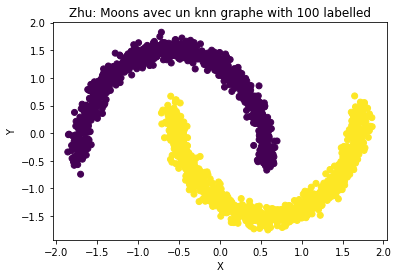

-----------Moons avec un knn graphe prédit avec Zhou pour 100 étiquettes connues
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       955
           1       1.00      0.94      0.97       945

    accuracy                           0.97      1900
   macro avg       0.97      0.97      0.97      1900
weighted avg       0.97      0.97      0.97      1900



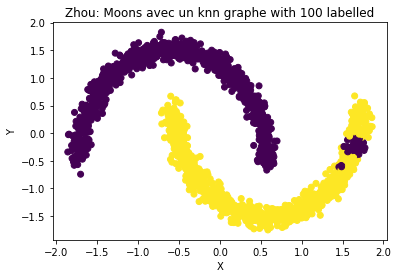

-----------Moons avec un knn graphe prédit avec Zhu pour 200 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       900

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



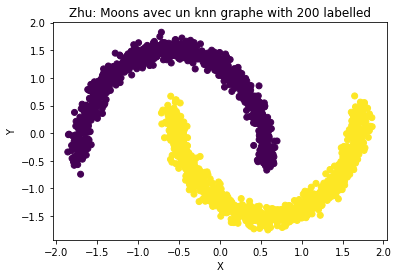

-----------Moons avec un knn graphe prédit avec Zhou pour 200 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       900

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



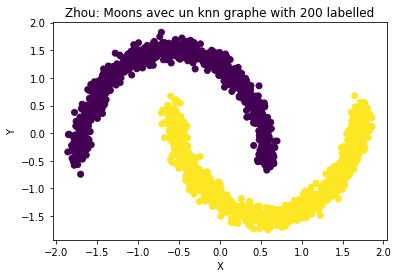

In [36]:
from sklearn.neighbors import kneighbors_graph
W = kneighbors_graph(X_moons,10,include_self=False).toarray()
print_res(W,y_moons,[2,5,10,50,100,200],"Moons avec un knn graphe", display=True, X=X_moons)

On remarque que:  
   - pour 2 étiquettes connues, la première méthode arrive à classer correctement toutes les observations, contrairement à la deuxième méthode.
   - pour 5 étiquettes connues, la première méthode arrive à classer correctement toutes les observations, contrairement à la deuxième méthode.
   - pour 10 étiquettes connues, la première méthode arrive à classer correctement toutes les observations, contrairement à la deuxième méthode. On remarque une légère amélioration pour la seconde méthode.
   - pour 50 étiquettes connues, la première méthode arrive à classer correctement toutes les observations, contrairement à la deuxième méthode. On remarque une amélioration pour la seconde méthode.
   - pour 100 étiquettes connues, la première méthode arrive à classer correctement toutes les observations, contrairement à la deuxième méthode. On remarque une amélioration pour la seconde méthode.
   - pour 200 étiquettes connues, les deux méthodes arrivent au même résultat (classification correcte). 

=> On remarque, de façon générale, que la deuxième méthode (Zhou) s'améliore progréssivement, quand on augmente le nombre d'étiquettes connues. La première méthode quand à elle est largement meilleur !

=> On remarque qu'avec knn graph on obtient de meilleur résultat qu'avec un noyeau gausien.

### Avec digits (noeud gaussien)

In [37]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits = digits.data
y_digits = digits.target
print("Nb Samples:", y_digits.shape[0])

#On choisit de faire le problème de classification binaire suivant, différencier les targets strictement inférieures à 5 des autres
for i in range(len(y_digits)):
    if y_digits[i]<5:
        y_digits[i]=0
    else: y_digits[i]=1
W_digits = pairwise_kernels(X_digits, metric="rbf")
W_digits = W_digits - np.eye(W_digits.shape[0])
print_res(W_digits,y_digits,[2,5,10,50,100,200],"Digits avec noeud gaussien")

Nb Samples: 1797
-----------Digits avec noeud gaussien prédit avec Zhu pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       899
           1       1.00      0.00      0.00       896

    accuracy                           0.50      1795
   macro avg       0.75      0.50      0.33      1795
weighted avg       0.75      0.50      0.33      1795

-----------Digits avec noeud gaussien prédit avec Zhou pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       899
           1       1.00      0.00      0.00       896

    accuracy                           0.50      1795
   macro avg       0.75      0.50      0.33      1795
weighted avg       0.75      0.50      0.33      1795

-----------Digits avec noeud gaussien prédit avec Zhu pour 5 étiquettes connues
              precision    recall  f1-score   support

           0       0.50      1.00

On remarque que:  
   - pour 2 étiquettes connues, on obtient les mêmes résultats avec les deux méthodes.
   - pour 5 étiquettes connues, on obtient les memes résultats qu'avec 2 étiquettes connues.
   - pour 10 étiquettes connues, on remarque la première méthode arrive à mieux classer les observations. La deuxième méthode donne les mêmes résultats que pour 2 et 5 étiquettes connues.
   - pour 50 étiquettes connues, la première méthode (Zhu) arrive à mieux prédire les classes (Score f1 plus élevé). On remarque aussi une légère amélioration pour la deuxième méthode comparé aux anciens résultats.
   - pour 100 étiquettes connues, pour la premère méthode (Zhu), on obtient les memes résultats que pour 50 étiquettes connues et elle reste meilleur que la deuxième, malgrès une légère amélioration.
   - pour 200 étiquettes connues, la première méthode (Zhu) arrive a peu prés aux mêmes anciens résultats (100 étiquettes), et reste meilleure que la deuixème. On remarque que la deuxième méthode s'est légèrement améliorer aussi !  

=> On remarque, de façon générale, que la première méthode (Zhu) est meilleur.

### Avec digits (knn graph)

In [38]:
W_digits2 = kneighbors_graph(X_digits,10,include_self=False).toarray()
print_res(W_digits2,y_digits,[2,5,10,50,100,200],"Digits avec un knn graphe")

-----------Digits avec un knn graphe prédit avec Zhu pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       899
           1       1.00      0.00      0.00       896

    accuracy                           0.50      1795
   macro avg       0.75      0.50      0.33      1795
weighted avg       0.75      0.50      0.33      1795

-----------Digits avec un knn graphe prédit avec Zhou pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       899
           1       1.00      0.00      0.00       896

    accuracy                           0.50      1795
   macro avg       0.75      0.50      0.33      1795
weighted avg       0.75      0.50      0.33      1795

-----------Digits avec un knn graphe prédit avec Zhu pour 5 étiquettes connues
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       896

On remarque que:  
   - pour 2 étiquettes connues, on obtient les mêmes résultats avec les deux méthodes.
   - pour 5 étiquettes connues, on obtient les memes résultats qu'avec 2 étiquettes connues.
   - pour 10 étiquettes connues, on remarque la première méthode arrive à mieux classer les observations. La deuxième méthode donne les mêmes résultats que pour 2 et 5 étiquettes connues.
   - pour 50 étiquettes connues, la première méthode (Zhu) arrive à mieux prédire les classes (Score f1 plus élevé). On remarque aussi une légère amélioration pour la deuxième méthode comparé aux anciens résultats.
   - pour 100 étiquettes connues, pour la premère méthode (Zhu), on obsèrve une légère amélioration avec 50 étiquettes connues et elle reste meilleur que la deuxième, malgrès une _large_ amélioration.
   - pour 200 étiquettes connues, la première méthode (Zhu) s'est encore améliorer, et qu'elle reste meilleur que la deuxième, qui elle même s'est améliorer.

=> On remarque, de façon générale, que la première méthode (Zhu) est meilleur.

=> On remarque aussi que dans les deux cas, transformation gausienne ou knn graph, on aboutit aux mêmes résultats

### Dataset réél
- https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

In [41]:
import pandas as pd
data2 = pd.read_csv('flights.csv', index_col=0).drop(['id'], axis=1).dropna()
data2

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [42]:
data2['Gender'] = data2['Gender'].astype('category').cat.codes
data2['Customer Type'] = data2['Customer Type'].astype('category').cat.codes
data2['Type of Travel'] = data2['Type of Travel'].astype('category').cat.codes
data2['Class'] = data2['Class'].astype('category').cat.codes
data2['satisfaction'] = data2['satisfaction'].astype('category').cat.codes
data2

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


<AxesSubplot:>

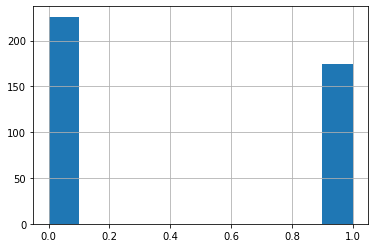

In [43]:
data2 = data2[:400]
data2['satisfaction'].hist()

In [44]:
X_flights = data2.drop(['satisfaction'], axis=1).values
X_flights = scale.fit_transform(X_flights)
y_flights = data2['satisfaction'].values

## Gaussian

In [45]:
W_flights = pairwise_kernels(X_flights, metric="rbf")
W_flights = W_flights - np.eye(W_flights.shape[0])
print_res(W_flights,y_flights,[2,5,10,50,100,200],"Flights avec noeud gaussien")

-----------Flights avec noeud gaussien prédit avec Zhu pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       224
           1       1.00      0.00      0.00       174

    accuracy                           0.56       398
   macro avg       0.78      0.50      0.36       398
weighted avg       0.75      0.56      0.41       398

-----------Flights avec noeud gaussien prédit avec Zhou pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       224
           1       1.00      0.00      0.00       174

    accuracy                           0.56       398
   macro avg       0.78      0.50      0.36       398
weighted avg       0.75      0.56      0.41       398

-----------Flights avec noeud gaussien prédit avec Zhu pour 5 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      0.00      0.00    

## knn

In [46]:
W_flights = kneighbors_graph(X_flights,10,include_self=False).toarray()
print_res(W_flights,y_flights,[2,5,10,50,100,200],"Flights avec noeud gaussien")

-----------Flights avec noeud gaussien prédit avec Zhu pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       224
           1       1.00      0.00      0.00       174

    accuracy                           0.56       398
   macro avg       0.78      0.50      0.36       398
weighted avg       0.75      0.56      0.41       398

-----------Flights avec noeud gaussien prédit avec Zhou pour 2 étiquettes connues
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       224
           1       1.00      0.00      0.00       174

    accuracy                           0.56       398
   macro avg       0.78      0.50      0.36       398
weighted avg       0.75      0.56      0.41       398

-----------Flights avec noeud gaussien prédit avec Zhu pour 5 étiquettes connues
              precision    recall  f1-score   support

           0       1.00      0.00      0.00    

- On remarque que la première méthode, Zhu, est meilleur que la deuxième, dans les deux cas: avec un noyeau gaussien et un knn.
- On remarque que au plus on augmente le nombre de noeuds étiquettés, au plus on obtient de meilleur score. On arrive déja à de bon score en connaissant 100 noeuds sur 400 !